In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
pd.pandas.set_option('display.max_columns', None)

In [2]:
X_train = pd.read_csv("../data/processed/xtrain.csv")
y_train = pd.read_csv("../data/processed/ytrain.csv")

X_test = pd.read_csv("../data/processed/xtest.csv")
y_test = pd.read_csv("../data/processed/ytest.csv")

In [3]:
optimal_hyperparams = {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
model = DecisionTreeRegressor(**optimal_hyperparams)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

model_mse = mean_squared_error(y_test, predictions)
print("MSE en conjunto de prueba para el modelo DecisionTreeRegressor:", model_mse)

MSE en conjunto de prueba para el modelo DecisionTreeRegressor: 0.015315986853585515


C:\Users\camil\AppData\Local\Temp\ipykernel_8256\2208226747.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


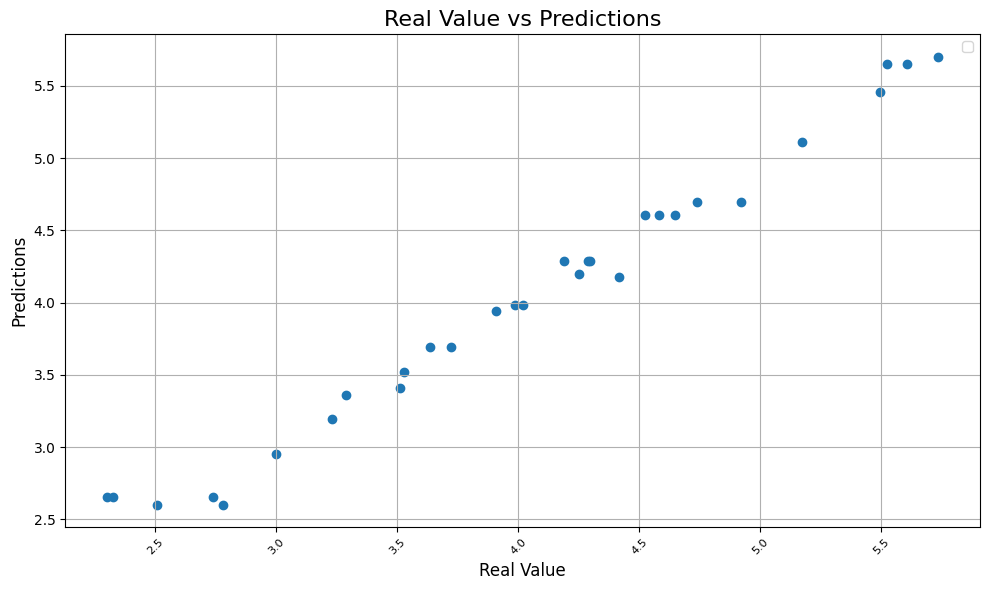

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(X_test))
plt.title("Real Value vs Predictions", fontsize=16)
plt.xlabel("Real Value", fontsize=12)
plt.ylabel("Predictions", fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

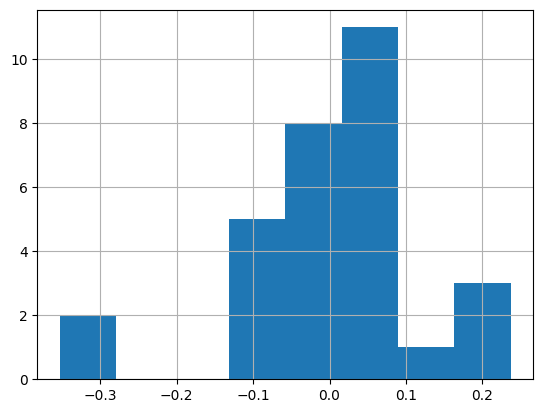

In [10]:
errors = y_test['Close'] - predictions
errors.hist(bins=8)
plt.show()

In [11]:
joblib.dump(model, '../model/tree_model.joblib')

['../model/tree_model.joblib']